# Ejercicios Weak Ties & Random Networks

Ejercicios básicos de redes

## Ejercicio Clustering Coeficient

iCalcule el coeficiente de clustering para cada nodo y en la red (sin dirección)

In [1]:
edges = set([(1,2), (2,3), (2,4), (2,5), (4,5), (4,6), (5,6), (4,7)])

In [2]:
from IPython.core.debugger import Tracer
import collections
import numpy as np

""" Without NetworkX """

edges = set([(1,2), (2,3), (2,4), (2,5), (4,5), (4,6), (5,6), (4,7)])

def edges_to_graph(edges):
    edges = list(edges)
    graph = {}
    
    for i in range(0,len(edges)):
        
        if graph.get(edges[i][0], None):
            graph[edges[i][0]].add(edges[i][1])
        else:
            if len(edges[i]) == 2:
                graph[edges[i][0]] = set([edges[i][1]])
            else:
                graph[edges[i][0]] = set([])
        
        if len(edges[i]) == 2:
            if graph.get(edges[i][1], None):
                graph[edges[i][1]].add(edges[i][0])
            else:
                graph[edges[i][1]] = set([edges[i][0]])

    return graph

G = edges_to_graph(edges)


def graph_to_tuples(graph):
    
    output_graph = []
    for node, neighbours in graph.items():
        output_graph.append((node,list(neighbours)))
    return output_graph


def element_neighbours(tuple_graph, element):
    
    
    for index, item in enumerate(tuple_graph):
        if element == item[0]:
            return item[1]
    
    raise IndexNotFoundError('Error: the requested element was not found')


def clustering_coefficient(graph):
    
    tuple_graph = graph_to_tuples(graph)
    L = np.zeros((len(tuple_graph),), dtype=np.int)

    for i in range(0, len(tuple_graph)):
        element_at_i = tuple_graph[i][0]
        for j in range(0, len(tuple_graph[i][1])-1):
            current = tuple_graph[i][1][j]
            for k in range(j+1, len(tuple_graph[i][1])):
                comparison = tuple_graph[i][1][k]
                # Search if there is a link
                if comparison in element_neighbours(tuple_graph, current):
                    L[i] += 1

    C = {}
    
    for i in range(len(tuple_graph)):
        k = len(tuple_graph[i][1])
        if k >= 2:
            C[tuple_graph[i][0]] = float(2*L[i])/(k*(k-1))
        else:
            C[tuple_graph[i][0]] = 0.0
            
    return C


def average_clustering(graph):
    C = clustering_coefficient(graph)
    return float(sum(C.values()))/len(C)

print(clustering_coefficient(G))
print(average_clustering(G))

import networkx as nx

G = nx.Graph()
G.add_edges_from(edges)

print(nx.clustering(G))
print(nx.average_clustering(G))
            
            
            
    

{1: 0.0, 2: 0.16666666666666666, 4: 0.3333333333333333, 7: 0.0, 6: 1.0, 5: 0.6666666666666666, 3: 0.0}
0.3095238095238095
{1: 0.0, 2: 0.16666666666666666, 4: 0.3333333333333333, 7: 0.0, 6: 1.0, 5: 0.6666666666666666, 3: 0.0}
0.3095238095238095


## Ejercicio Weigthed Netwroks

Cree una red no direccionada con los siguientes pesos.

(a, b) = 0.3
(a, c) = 1.0
(a, d) = 0.9
(a, e) = 1.0
(a, f) = 0.4
(c, f) = 0.2
(b, h) = 0.2
(f, j) = 0.8
(f, g) = 0.9
(j, g) = 0.6
(g, k) = 0.4
(g, h) = 0.2
(k, h) = 1.0

In [3]:
# To create a weighted, undirected graph, the edges must be provided in the form: (node1, node2, weight)

edges = [('a', 'b', 0.3), ('a', 'c', 1.0), ('a', 'd', 0.9), ('a', 'e', 1.0), ('a', 'f', 0.4),
             ('c', 'f', 0.2), ('b', 'h', 0.2), ('f', 'j', 0.8), ('f', 'g', 0.9), ('j', 'g', 0.6),
             ('g', 'k', 0.4), ('g', 'h', 0.2), ('k', 'h', 1.0)]

def edges_to_weighted_graph(edges):
    edges = list(edges)
    graph = {}
    
    for i in range(0,len(edges)):
        
        if graph.get(edges[i][0], None):
            graph[edges[i][0]].add((edges[i][1], edges[i][2]))
        else:
            if len(edges[i]) == 3:
                graph[edges[i][0]] = set([(edges[i][1],edges[i][2])])
            else:
                graph[edges[i][0]] = set([])
        
        if len(edges[i]) == 3:
            if graph.get(edges[i][1], None):
                graph[edges[i][1]].add((edges[i][0],edges[i][2]))
            else:
                graph[edges[i][1]] = set([(edges[i][0],edges[i][2])])

    return graph

graph = edges_to_weighted_graph(edges)

print (graph)

""" With NetworkX """

FG = nx.Graph()

FG.add_weighted_edges_from(edges)

print (str(FG))

{'a': {('b', 0.3), ('e', 1.0), ('d', 0.9), ('c', 1.0), ('f', 0.4)}, 'b': {('a', 0.3), ('h', 0.2)}, 'c': {('a', 1.0), ('f', 0.2)}, 'd': {('a', 0.9)}, 'e': {('a', 1.0)}, 'f': {('a', 0.4), ('c', 0.2), ('g', 0.9), ('j', 0.8)}, 'h': {('b', 0.2), ('k', 1.0), ('g', 0.2)}, 'j': {('g', 0.6), ('f', 0.8)}, 'g': {('k', 0.4), ('h', 0.2), ('j', 0.6), ('f', 0.9)}, 'k': {('h', 1.0), ('g', 0.4)}}



Imprima la matriz de adyasencia

In [4]:
def adjacency_matrix(graph):
    keys = list(graph.keys())
    keys.sort()
    
    adj_matrix = np.zeros((len(keys),len(keys)))
    
    for node, edges in graph.items():
        for edge in edges:
            adj_matrix[keys.index(node)][keys.index(edge[0])] = edge[1]
    
    return (adj_matrix, keys)

print (adjacency_matrix(graph))

""" With NetworkX """
A = nx.adjacency_matrix(FG)

print (A)

(array([[ 0. ,  0.3,  1. ,  0.9,  1. ,  0.4,  0. ,  0. ,  0. ,  0. ],
       [ 0.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ],
       [ 0.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.4,  0. ,  0.2,  0. ,  0. ,  0. ,  0.9,  0. ,  0.8,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.9,  0. ,  0.2,  0.6,  0.4],
       [ 0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.8,  0.6,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.4,  1. ,  0. ,  0. ]]), ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k'])
  (0, 1)	0.3
  (0, 2)	1.0
  (0, 3)	0.9
  (0, 4)	1.0
  (0, 5)	0.4
  (1, 0)	0.3
  (1, 6)	0.2
  (2, 0)	1.0
  (2, 5)	0.2
  (3, 0)	0.9
  (4, 0)	1.0
  (5, 0)	0.4
  (5, 2)	0.2
  (5, 7)	0.8
  (5, 8)	0.9
  (6, 1)	0.2
  (6, 8)	0.2
  (6, 9)	1.0
  (7, 5)	0.8
  (7, 8)

## Ejercicio Weak & Strong ties

Con la misma red anterior asuma que un link debil es inferior a 0.5, cree un código que calcule si se cumple la propiedad "strong triadic closure"

In [5]:
def weighted_element_neighbours(tuple_graph, element):
    
    for index, item in enumerate(tuple_graph):
        if element[0] == item[0]:
            neighbours = [i[0] for i in item[1]]
            return neighbours
    
    raise IndexNotFoundError('Error: the requested element was not found')
    

def weighted_graph_to_tuples(graph):
    
    output_graph = []
    for node, neighbours in graph.items():
        output_graph.append((node,list(neighbours)))
    return output_graph


def triadic_closure(graph):
    
    tuple_graph = weighted_graph_to_tuples(graph)
    L = np.zeros((len(tuple_graph),), dtype=np.int)

    for i in range(0, len(tuple_graph)):
        element_at_i = tuple_graph[i][0]
        for j in range(0, len(tuple_graph[i][1])-1):
            current = tuple_graph[i][1][j]
            weight_current = current[1]
            if weight_current >= 0.5:
                for k in range(j+1, len(tuple_graph[i][1])):
                    comparison = tuple_graph[i][1][k]
                    weight_comparison = comparison[1]
                    if weight_comparison >= 0.5:
                    # Search if there is a link
                        if not comparison[0] in weighted_element_neighbours(tuple_graph, current):
                            return False

    return True

print(triadic_closure(graph))

edges2 = [('a','b',0.1),('a','c',0.5),('a','d',0.9),('a','e',0.6),('c','d',0.1),('c','e',0.4),('d','e',0.9)]

graph2 = edges_to_weighted_graph(edges2)

print(triadic_closure(graph2))


""" With NetworkX """



False
True


' With NetworkX '

Cambie un peso de los links anteriores para que se deje de cumplir la propiedad y calcule si es cierto. Explique.

Escriba un código que detecte puntes locales y que calcule el span de cada puente local

In [6]:
import copy
""" The following code is thought for unweighted graphs """

edges3 = [(1,2),(1,3),(1,5),(5,6),(2,6),(2,1),(2,4)]
edges4 = [('a','b'),('a','c'),('a','d'),('a','e'),('a','f'),
         ('b','h'),('c','d'),('c','e'),('c','f'),('d','e'),
         ('f','j'),('f','g'),('j','g'),('g','k'),('g','h'),
         ('k','h')]

""" This function was taken from Python Software Foundation.
    Python Patterns - Implementing Graphs. https://www.python.org/doc/essays/graphs/ 
    (Visited in march 2017) """
def find_shortest_path(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    if not start in graph:
        return None
    shortest = None
    for next in graph[start]:
        if next not in path:
            newpath = find_shortest_path(graph, next, end, path)
            if newpath:
                if not shortest or len(newpath) < len(shortest):
                    shortest = newpath
    return shortest

# Returns a tuple containing two values:
# Input: an undirected graph G in form of a dict
# (True, span) if there is a local bridge (span > 2) between two nodes
# (True, None) if there is a bridge between two nodes
# (False, None) otherwise

def bridge(graph, start, end):
    if not end in graph[start]:
        return (False, None)
    
    new_graph = copy.deepcopy(graph)
    new_graph[start] = graph[start] - {end}
    new_graph[end] = graph[end] - {start}
    span_path = find_shortest_path(new_graph, start, end)
    
    if not span_path:
        # Global bridge
        return (True, None)
    
    path_length = len(span_path) - 1
    if path_length > 2:
        return (True, path_length)
    elif path_length == 2:
        return (False, path_length)
    elif path_length == 1:
        raise MultiGraphNotAllowedError('Error: Multigraphs are not allowed')
    else:
        raise ReflexiveRelationsNotAllowedError('Error: Reflexive relations are not allowed')
    

graph3 = edges_to_graph(edges3)

# Return the places of the graph where there is a bridge and the
# span of each bridge as a vector of tuples in the form (start, end, span)

def local_bridges(graph):
    nodes = list(graph.keys())
    result = []
    for i in range(0, len(nodes)-1):
        node1 = nodes[i]
        for j in range(i+1, len(nodes)):
            node2 = nodes[j]
            brd = bridge(graph, nodes[i], nodes[j])
            if brd[0] and brd[1] != None:
                result.append((nodes[i],nodes[j],{'span':brd[1]}))
    
    return result
            
brds = local_bridges(graph3)
print(brds)

graph4 = edges_to_graph(edges4)

print(local_bridges(graph4))

def distance_matrix(graph):
    keys = list(graph.keys())
    keys.sort()
    
    d_matrix = np.zeros((len(keys),len(keys)))
    
    for i in range(0, len(keys)):
        for j in range(0, len(keys)):
            start = keys[i]
            end = keys[j]
            path = find_shortest_path(graph, start, end)
            d_matrix[i][j] = len(path)-1
    
    return (d_matrix, keys)

""" With NetworkX """



[(1, 2, {'span': 3}), (1, 5, {'span': 3}), (2, 6, {'span': 3}), (5, 6, {'span': 3})]
[('a', 'b', {'span': 4}), ('b', 'h', {'span': 4})]


' With NetworkX '

## Ejercicio Random Networks

genere 1000 redes aleatorias N = 12, p = 1/6 y grafique la distribución del número de enlaces

/home/sangeea/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



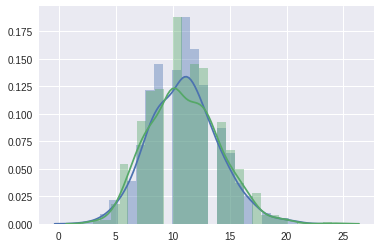

In [14]:
import random
import seaborn as sns

%matplotlib inline

N = 12
p = float(1)/6


def random_network_links(N, p):
    edges = []
    
    for i in range(0, N-1):
        for j in range(i+1, N):
            rand = random.random()
            if rand <= p:
                edges.append((i+1,j+1))
    
    return edges

def random_network_links2(N, p):
    
    edges = []
    adj_matrix = np.zeros((N,N), dtype=int)
    
    for i in range(0, N-1):
        for j in range(i+1, N):
            rand = random.random()
            if rand <= p:
                edges.append((i+1,j+1))
                adj_matrix[i][j] = 1
                adj_matrix[j][i] = 1
    
    for i in range(0, N):
        if sum(adj_matrix[i]) == 0:
            edges.append((i+1,))
            
    return edges

# Returns a number of random networks in the form of a list of edges
def random_networks(number_of_networks, N, p):
    
    networks = []
    for i in range(0, number_of_networks):
        networks.append(random_network_links2(N,p))
        
    return networks

def len_edges(edges_graph):
    result = 0
    for edge in edges_graph:
        if len(edge) == 2:
            result += 1
    return result

networks1 = random_networks(1000,N,p)
len_edges1 = [len_edges(i) for i in networks1]
ax = sns.distplot(len_edges1)
    
""" With NetworkX """

def random_networks_nx(number_of_networks, N, p):
    
    networks = []
    for i in range(0, number_of_networks):
        G_ran = nx.gnp_random_graph(N,p)
        networks.append(G_ran)
        
    return networks

networks2 = random_networks_nx(1000,N,p)
len_edges2 = [len(G.edges()) for G in networks2]

sns.distplot(len_edges2)
        

Grafique la distribución del promedio de grados en cada una de las redes generadas del ejercicio anterior

/home/sangeea/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



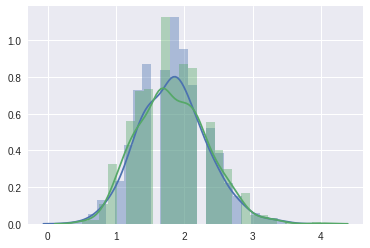

In [15]:
% matplotlib inline
# Transform the list of lists of edges to a list of dicts, this is done to
# calculate the average degree distribution in the next methods

networks1_graph = [edges_to_graph(edges) for edges in networks1]

def degrees(graph):
    degrees = {}
    for node, links in graph.items():
        degrees[node] = len(links)
    return degrees

def avg_degree(graph):
    dgrs = degrees(graph)
    return float(sum(dgrs.values()))/len(dgrs)

avg_degrees1 = [avg_degree(network) for network in networks1_graph]

ax = sns.distplot(avg_degrees1)


""" With NetworkX """
def avg_degree_nx(graph):
    graph_degrees = graph.degree()
    return float(sum(graph_degrees.values()))/len(graph_degrees)

avg_degrees2 = [avg_degree_nx(network) for network in networks2]

sns.distplot(avg_degrees2)

Haga lo mismo para redes con 100 nodos

/home/sangeea/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



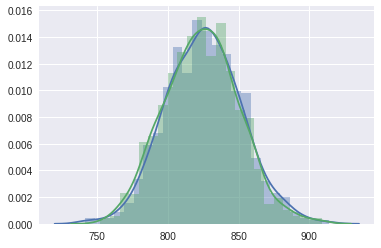

In [16]:
% matplotlib inline

networks100_1 = random_networks(1000, 100, p)
networks100_2 = random_networks_nx(1000,100,p)

len_edges100_1 = [len_edges(i) for i in networks100_1]

ax = sns.distplot(len_edges100_1)
len_edges100_2 = [len(G.edges()) for G in networks100_2]

sns.distplot(len_edges100_2)

/home/sangeea/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



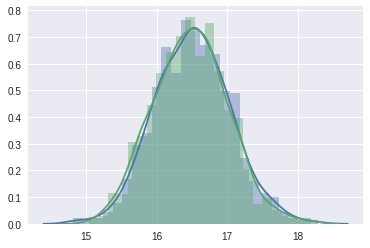

In [17]:
networks100_1_graph = [edges_to_graph(edges) for edges in networks100_1]
avg_degrees100_1 = [avg_degree(network) for network in networks100_1_graph]

avg_degrees100_2 = [avg_degree_nx(network) for network in networks100_2]

ax = sns.distplot(avg_degrees100_1)
sns.distplot(avg_degrees100_2)


## Ejercicio Random Networks - Componente Gigante

Grafique como crece el tamaño del componente más grande de una red aleatoria con N=100 nodos y diferentes valores de ___p___

(_grafique con promedio de grado entre 0 y 4 cada 0.05_)

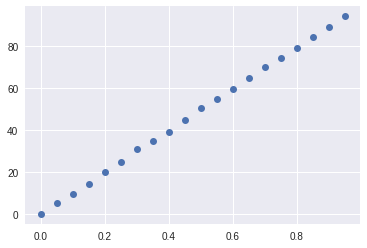

In [11]:
""" The following code snippet was taken from Mann, Edd. Depth-First Search and Breadth-First Search in Python.
    http://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/ """

graph5 = copy.deepcopy(graph4)

graph5['m'] = {'n'}
graph5['n'] = {'m'}

def bfs(graph, start):
    visited, queue = set(), collections.deque([start])
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
    return visited

# return a list of lists of nodes of 'graph' each one being the nodes that
# define a specific connected component of of 'graph'

def connected_components(graph):
    components = []
    nodes = set(graph.keys())
    while len(nodes):
        root = next(iter(nodes))
        visited = bfs(graph, root)
        components.append(visited)
        nodes = nodes - visited
        
    return components

# Returns a set containing the nodes of a graph's biggest component
def biggest_component_nodes(graph):
    components = connected_components(graph)
    lengths = [len(component) for component in components]
    
    max_component = 0
    max_index = -1
    for i in range(0, len(lengths)):
        if lengths[i] > max_component:
            max_component = lengths[i]
            max_index = i
    
    return components[max_index]

# Returns a subgraph containing the biggest connected component of 'graph'
def biggest_component(graph):
    nodes = biggest_component_nodes(graph)
    nodes = list(nodes)
    subgraph = {k:graph[k] for k in nodes if k in graph}
    
    return subgraph


# Plot results
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import Scatter, Figure, Layout
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

def plot_giant_component_growth(N):
    p_vector = []
    avg_degree_vector = []
    
    p = 0.0
    while p <= 1:
        p_vector.append(p)
        network = random_network_links2(N,p)
        network = edges_to_graph(network)
        
        component = biggest_component(network)
        
        avg_degree_vector.append(avg_degree(component))
        p += 0.05
        
    plt.plot(p_vector, avg_degree_vector, "o")

plot_giant_component_growth(100)


Grafique cuál es el porcentaje de nodos del componente más grande para diferentes valores de ___p___

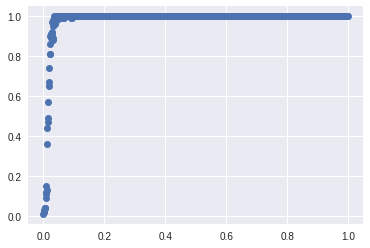

In [12]:
def plot_giant_component_growth_nodes(N):
    p_vector = []
    node_percentages = []
    
    p = 0.0
    while p <= 1:
        p_vector.append(p)
        network = random_network_links2(N,p)
        network = edges_to_graph(network)
        
        component = biggest_component(network)
        component_percentage = float(len(component))/len(network)
        
        node_percentages.append(component_percentage)
        p += 0.001
        
    plt.plot(p_vector, node_percentages, "o")
    
plot_giant_component_growth_nodes(100)

Identifique para que valores de ___p___ el componente mas grande esta totalmente interconectado

In [13]:
def identify_p_value_for_total_connection(N):
    p = 0.0
    while p <= 1:
        network = random_network_links2(N,p)
        network = edges_to_graph(network)
        
        component = biggest_component(network)
        component_percentage = float(len(component))/len(network)
        
        if component_percentage == 1:
            return p
        p += 0.001
        
    return 1 # Default value for a totally connected component
    
identify_p_value_for_total_connection(100)

0.03900000000000003